# Digit Classification

This notebook is a very simple exercise of training an ML model from start to finish to classify handwritten digits. It will explore the basics of installing and importing all of the required dependencies and downloading a dataset.

Some basic tools will be provided for you to visualise the data, then it is up to you to research, build, and train a model in whatever architecture you'd like with whatever framework you choose. 

### Install Dependencies
Make sure that you have python3 installed on your machine.

If using pip3, install tensorflow using the following cell:

In [3]:
pip install tensorflow

If using anaconda, run:

In [5]:
conda install tensorflow

Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [98]:
import tensorflow as tf                      #1
import numpy as np                           #2 
import matplotlib.pyplot as plt              #3
from random import *                         #4

Using TensorFlow backend.


We are going to use the MNIST dataset of handwritten digits {0-9} in black and white.  This is available on Kaggle (here: https://www.kaggle.com/c/digit-recognizer/code).

But helpfully Tensorflow (import 1) hosts an easy way to import the dataset with very little fuss (Info here: https://www.tensorflow.org/datasets/catalog/mnist). This lets us explore a very simple example of how to set up our data into a set of inputs (X) and outputs (Y) that we can form a model out of:

### Download Data

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

Now we have downloaded a training and test set made up of images (X) and labels (Y).
The shapes of our input and output can be checked by printing out just the first image/label sizes using the numpy (np, see import 2) library.

### Visualise Data

In [5]:
print('Our first image is: ' + str(np.shape(train_images[0])))
print('Our first label is: ' + str(train_labels[0]))

Our first image is: (28, 28)
Our first label is: 5


Our image, as expected is a set of 28x28 pixels with a range of 0 - 255 and our label is the digit that the picture shows.  To make this easy to confirm as correctly labled, let's also show the image.

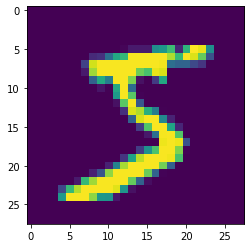

In [6]:
plt.imshow(train_images[0])

We can use a random number generator to sample the training dataset

Image 57243 is labled as: 1


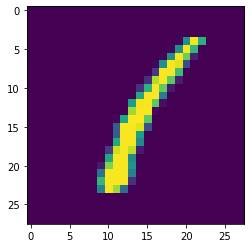

In [7]:
selected = randint(0, len(train_images)-1)
plt.imshow(train_images[selected])
print('Image ' + str(selected) + ' is labled as: ' + str(train_labels[selected]))

### Normalise the data
We are currently using a range of 0 - 255, this causes issues when working with neural networks as deep networks can cause values to explode exponentially.  So we will normalise all of our values to be between 0 to 1.  This is not the only range possible, but is frequently used. We could write a function that does this for all values, making sure to take the highest value equal to 1 and lowest to 0.  

However numpy has again got a very useful interpolation function that can provide us with the answer in one line.

In [8]:
train_images = np.interp(train_images, (train_images.min(), train_images.max()), (0, 1))
test_images = np.interp(test_images, (test_images.min(), test_images.max()), (0, 1))

# Taking a random sample to see if it has worked
for i in range(0,10):
    random_sample = randint(0, len(train_images)-1)
    max_value = np.max(train_images[random_sample])
    min_value = np.min(train_images[random_sample])
    print('Image ' + str(random_sample) + ' max: ' + str(max_value) + ' min: ' + str(min_value))

Image 59560 max: 1.0 min: 0.0
Image 5780 max: 1.0 min: 0.0
Image 57859 max: 1.0 min: 0.0
Image 14020 max: 1.0 min: 0.0
Image 14561 max: 1.0 min: 0.0
Image 27562 max: 1.0 min: 0.0
Image 41095 max: 1.0 min: 0.0
Image 18031 max: 1.0 min: 0.0
Image 29824 max: 1.0 min: 0.0
Image 15025 max: 1.0 min: 0.0


We can also check that the data hasn't changed the image by re-running our visualisation code again

Image 48415 is labled as: 3


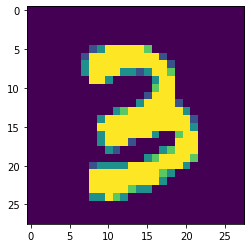

In [27]:
selected = randint(0, len(train_images)-1)
plt.imshow(train_images[selected])
print('Image ' + str(selected) + ' is labled as: ' + str(train_labels[selected]))

### Reshape Data
This is a good start, but currently our data is in a 3 dimentional array of images with each one looking like this:

$$
\begin{bmatrix}
0 & 1 & ... & n-1 & n \\
1 & px & px & px & px \\
\vdots & px & px & px & px \\
n-1 & px & px & px & px \\
n & px & px & px & px
\end{bmatrix}
\cdot m
$$

Where our image is $n\times n$ in size and there are $m$ images in the data set.  This needs to be converted to something that we can input into the first layer of our neural network, and we can to this by adding all of our columns of pixels end to end to form a single vector:

$$
\begin{bmatrix}
0 \\
1 \\
\vdots \\
n^{2}-1 \\
n^{2}
\end{bmatrix}
\cdot m
$$

We can then stack all of our $m$ images together to form a two dimensional $n\times m$ matrix: 

$$
\begin{bmatrix}
0 & 1 & \cdots & m-1 & m \\
1 & \ddots &  &  &  \\
\vdots & & \ddots &  & \vdots \\
n-1 &  &  & \ddots &  \\
n &  & \cdots &  & n \times m
\end{bmatrix}
$$

In [10]:
# First print out the original shapes
print('Train data is: ' + str(np.shape(train_images)))
print('Test data is: ' + str(np.shape(test_images)))

# Using numpy, reshape the array into the desired shape
X_train = train_images.reshape(len(train_images), 28*28)
X_test = test_images.reshape(len(test_images), 28*28)

# Print out the final shape
print('Reshaped train data is: ' + str(np.shape(X_train)))
print('Reshaped test data is: ' + str(np.shape(X_test)))

Train data is: (60000, 28, 28)
Test data is: (10000, 28, 28)
Reshaped train data is: (60000, 784)
Reshaped test data is: (10000, 784)


Now for our labels, we already have an  $m \times 1$  vector so we can simply rename them to `Y_test` and `Y_train` and  confirm that they are the right shapes of (m,) where the lack of a second number means that it is a one dimensional array (or vector). 

In [104]:
# Rename our data
Y_train = train_labels;
Y_test = test_labels;

# Print to confirm
print('Train Y is: ' + str(np.shape(Y_train)))
print('Test Y is: ' + str(np.shape(Y_test)))

Train Y is: (60000,)
Test Y is: (10000,)


#### Now you are ready to build your model!

In [105]:
input_shape = (np.shape(X_train)[1],)
output_shape = 10

print('Input Shape: ' + str(input_shape))
print('Output Shape: ' + str(output_shape))

Input Shape: (784,)
Output Shape: 10


In [118]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=input_shape))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(output_shape))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=None, decay=0.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)


In [119]:
print('Train on training data')
model.fit(X_train, Y_train, batch_size=32, epochs=100)

Train on training data
Epoch 1/100
1875/1875 [==============================] - 2s 901us/step - loss: 0.4221 - sparse_categorical_accuracy: 0.8777
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.9020
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3296 - sparse_categorical_accuracy: 0.9079
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.9101
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3105 - sparse_categorical_accuracy: 0.9143
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3079 - sparse_categorical_accuracy: 0.9150
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3028 - sparse_categorical_accuracy: 0.9167
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3023 - sparse_categorical_accuracy: 0.9145

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2806 - sparse_categorical_accuracy: 0.9233
Epoch 68/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2802 - sparse_categorical_accuracy: 0.9239
Epoch 69/100
1875/1875 [==============================] - 1s 749us/step - loss: 0.2804 - sparse_categorical_accuracy: 0.9247
Epoch 70/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2800 - sparse_categorical_accuracy: 0.9238
Epoch 71/100
1875/1875 [==============================] - 2s 878us/step - loss: 0.2789 - sparse_categorical_accuracy: 0.9237
Epoch 72/100
1875/1875 [==============================] - 2s 810us/step - loss: 0.2803 - sparse_categorical_accuracy: 0.9241
Epoch 73/100
1875/1875 [==============================] - 2s 982us/step - loss: 0.2800 - sparse_categorical_accuracy: 0.9226
Epoch 74/100
1875/1875 [==============================] - 2s 982us/step - loss: 0.2803 - sparse_categorical_accuracy: 0.9241
Epoch 75/100
1875/1

In [47]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=128)


Evaluate on test data
79/79 [==============================] - 0s 531us/step - loss: 0.3070 - sparse_categorical_accuracy: 0.9137


## Hyperparameter Tuning
With the current hyperparameters, we get an accuracy of around 90%.  This isn't bad, but we can see how different hyperparameters effect our model's performance.  First, let's look at the effect of the number of nodes in our single hidden layer.  To do this, we can first define a function that will build a model with $n$ nodes in the hidden layer:

In [49]:
def build_model(n):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=input_shape))
    model.add(tf.keras.layers.Dense(n))
    model.add(tf.keras.layers.Dense(output_shape))
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],)
    return model

In [89]:
params = [x*8 for x in range(3,28)]
results = []

for n in params:
    model = build_model(n)
    model.fit(X_train, Y_train, batch_size=32, epochs=10)
    result = model.evaluate(X_test, Y_test, batch_size=128)
    results.append(result)

Epoch 1/10
1875/1875 [==============================] - 1s 376us/step - loss: 0.4017 - sparse_categorical_accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 1s 406us/step - loss: 0.2902 - sparse_categorical_accuracy: 0.9183
Epoch 3/10
1875/1875 [==============================] - 1s 410us/step - loss: 0.2779 - sparse_categorical_accuracy: 0.9232
Epoch 4/10
1875/1875 [==============================] - 1s 409us/step - loss: 0.2710 - sparse_categorical_accuracy: 0.9245
Epoch 5/10
1875/1875 [==============================] - 1s 411us/step - loss: 0.2666 - sparse_categorical_accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 1s 416us/step - loss: 0.2631 - sparse_categorical_accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 1s 424us/step - loss: 0.2606 - sparse_categorical_accuracy: 0.9271
Epoch 8/10
1875/1875 [==============================] - 1s 431us/step - loss: 0.2575 - sparse_categorical_accuracy: 0.9295
Epoch 9/10
1875/

1875/1875 [==============================] - 1s 528us/step - loss: 0.2951 - sparse_categorical_accuracy: 0.9172
Epoch 3/10
1875/1875 [==============================] - 1s 522us/step - loss: 0.2831 - sparse_categorical_accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 1s 522us/step - loss: 0.2771 - sparse_categorical_accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 1s 528us/step - loss: 0.2726 - sparse_categorical_accuracy: 0.9238
Epoch 6/10
1875/1875 [==============================] - 1s 525us/step - loss: 0.2696 - sparse_categorical_accuracy: 0.9250
Epoch 7/10
1875/1875 [==============================] - 1s 505us/step - loss: 0.2660 - sparse_categorical_accuracy: 0.9259
Epoch 8/10
1875/1875 [==============================] - 1s 531us/step - loss: 0.2629 - sparse_categorical_accuracy: 0.9264
Epoch 9/10
1875/1875 [==============================] - 1s 528us/step - loss: 0.2623 - sparse_categorical_accuracy: 0.9261
Epoch 10/10
79/79 [========

1875/1875 [==============================] - 1s 610us/step - loss: 0.2865 - sparse_categorical_accuracy: 0.9193
Epoch 4/10
1875/1875 [==============================] - 1s 565us/step - loss: 0.2798 - sparse_categorical_accuracy: 0.9215
Epoch 5/10
1875/1875 [==============================] - 1s 564us/step - loss: 0.2768 - sparse_categorical_accuracy: 0.9231
Epoch 6/10
1875/1875 [==============================] - 1s 560us/step - loss: 0.2720 - sparse_categorical_accuracy: 0.9246
Epoch 7/10
1875/1875 [==============================] - 1s 585us/step - loss: 0.2698 - sparse_categorical_accuracy: 0.9245
Epoch 8/10
1875/1875 [==============================] - 1s 598us/step - loss: 0.2672 - sparse_categorical_accuracy: 0.9246
Epoch 9/10
1875/1875 [==============================] - 1s 590us/step - loss: 0.2657 - sparse_categorical_accuracy: 0.9261
Epoch 10/10
79/79 [==============================] - 0s 566us/step - loss: 0.2828 - sparse_categorical_accuracy: 0.9243
Epoch 1/10
1875/1875 [========

1875/1875 [==============================] - 2s 974us/step - loss: 0.2846 - sparse_categorical_accuracy: 0.9203
Epoch 5/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.2795 - sparse_categorical_accuracy: 0.9227
Epoch 6/10
1875/1875 [==============================] - 1s 722us/step - loss: 0.2758 - sparse_categorical_accuracy: 0.9223
Epoch 7/10
1875/1875 [==============================] - 1s 682us/step - loss: 0.2740 - sparse_categorical_accuracy: 0.9240
Epoch 8/10
1875/1875 [==============================] - 1s 596us/step - loss: 0.2697 - sparse_categorical_accuracy: 0.9245
Epoch 9/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.2673 - sparse_categorical_accuracy: 0.9254
Epoch 10/10
79/79 [==============================] - 0s 497us/step - loss: 0.2904 - sparse_categorical_accuracy: 0.9223
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3585 - sparse_categorical_accuracy: 0.8971
Epoch 2/10
1875/1875 [==========

1875/1875 [==============================] - 2s 883us/step - loss: 0.2815 - sparse_categorical_accuracy: 0.9205
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2786 - sparse_categorical_accuracy: 0.9209
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2749 - sparse_categorical_accuracy: 0.9237
Epoch 8/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.2732 - sparse_categorical_accuracy: 0.9230
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2702 - sparse_categorical_accuracy: 0.9243
Epoch 10/10
79/79 [==============================] - 0s 564us/step - loss: 0.2940 - sparse_categorical_accuracy: 0.9193


In [93]:
losses = []
accuracies = []

for r in results:
    losses.append(r[0])
    accuracies.append(r[1])
    

In [94]:
print(results)

[[0.2853652536869049, 0.9236999750137329], [0.2706524133682251, 0.9240999817848206], [0.2794591188430786, 0.9251000285148621], [0.2831665873527527, 0.9203000068664551], [0.2719002068042755, 0.9246000051498413], [0.2838566303253174, 0.9222000241279602], [0.2807924151420593, 0.9247999787330627], [0.28871768712997437, 0.9190000295639038], [0.28834468126296997, 0.9217000007629395], [0.2859114706516266, 0.9253000020980835], [0.28850239515304565, 0.920799970626831], [0.29650789499282837, 0.9164000153541565], [0.2828270196914673, 0.9243000149726868], [0.28131571412086487, 0.9221000075340271], [0.2773425281047821, 0.925000011920929], [0.30121421813964844, 0.9207000136375427], [0.29038769006729126, 0.9229000210762024], [0.285357803106308, 0.9223999977111816], [0.2903877794742584, 0.9222999811172485], [0.29286134243011475, 0.916700005531311], [0.28737208247184753, 0.9221000075340271], [0.28844138979911804, 0.9212999939918518], [0.28532320261001587, 0.9226999878883362], [0.28137969970703125, 0.92

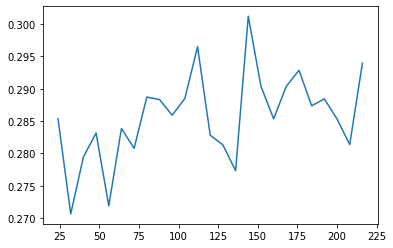

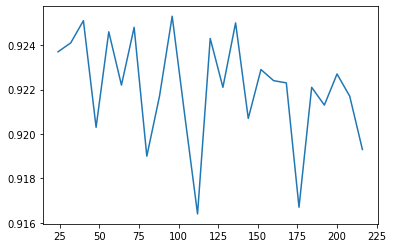

In [95]:
plt.figure(1)
plt.plot(params, losses)
plt.figure(2)
plt.plot(params, accuracies)

In [88]:
L = [x*16 for x in range(3,13)]
print(L)

[48, 64, 80, 96, 112, 128, 144, 160, 176, 192]
